# FINAL PROJECT: 

KELOMPOK 4 :
- Jonathan Adiwinata
- Melin Febriani

## Introduction

Kartu kredit adalah kartu yang biasanya memberikan akses ke jumlah kredit yang dapat digunakan untuk melakukan pembayaran dan memanfaatkan layanan. Jumlah kredit ini memiliki waktu pembayaran di mana jumlah tersebut harus dilunasi. Kelebihan dari kartu kredit adalah  menawarkan hadiah dalam bentuk cashback atau poin. Kartu kredit dikeluarkan oleh bank atau pemberi pinjaman kredit jenis apa pun. Dalam proyek ini, telah diberikan data ekstensif tentang nasabah bank selama 6 bulan terakhir yang mencakup frekuensi transaksi, jumlah, jangka waktu... dll. Data ini berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan dan 18 atribut. Data ini akan digunakan untuk meluncurkan kampanye iklan pemasaran bertarget yang disesuaikan dengan kelompok pelanggan tertentu. Oleh sebab itu dalam proyek ini akan dilakukan clustering untuk membagi nasabahnya menjadi setidaknya 3 kelompok berbeda. Untuk memaksimalkan tingkat konversi kampanye pemasaran akan dilakukan clustering dengan menggunakan 3 metode yaitu K-Means, DBSCan dan Hiericharl Clustering 

## Import Libraries

Install dan import libraries yang digunakan.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib as mpl
import plotly.graph_objects as go
from scipy import stats
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler

import warnings
warnings.filterwarnings("ignore")

C:\Users\lenov\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
mpl.style.use(['ggplot'])

## Data Loading

In [4]:
data = pd.read_csv('C:/Kuliah/Studi Independen/CC GENERAL.csv')
# data = pd.read_csv('E:/Cool Yeah/Hacktiv8/Final-Project_Kelompok4/Data/CC_GENERAL.csv')

Memanggil bagian kepala data.

In [5]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Memanggil bagian ekor data.

In [6]:
data.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


Mengecek dimensi data.

In [7]:
data.shape

(8950, 18)

Dari hasil diatas terdapat 8.950 baris data dan 18 kolom data

Mengecek info dataset.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Mengecek tipe data apa saja yg ada pada variabel.

In [9]:
data.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

Terdapat 3 variabel bertipe integer dan 14 variabel bertipe float

Statistik Deskriptif.

In [10]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Mengecek atribut data.

In [11]:
data.TENURE.value_counts()

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

## Data Cleaning

Mengecek jumlah data yang memiliki duplicate.

In [12]:
data.duplicated().sum()

0

Mengecek apakah masih terdapat data duplicated pada data dan hasilnya tidak ada.

In [13]:
data.duplicated().value_counts()

False    8950
dtype: int64

### Mengisi Missing Value

In [14]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Pada data terdapat missing value pada variabel 'Minimum_Payment' sebanyak 313 dan 'Credit_Limit' sebanyak 1

In [15]:
#Mengisi mising value dengan nilai mean
data.loc[(data['MINIMUM_PAYMENTS'].isnull() == True), 
                  'MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].mean()

data.loc[(data['CREDIT_LIMIT'].isnull() == True), 
                  'CREDIT_LIMIT'] = data['CREDIT_LIMIT'].mean()

data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

sudah tidak terdapat data yang missing value

In [16]:
data.drop('CUST_ID', axis=1, inplace=True)

In [17]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Data Exploration

In [18]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

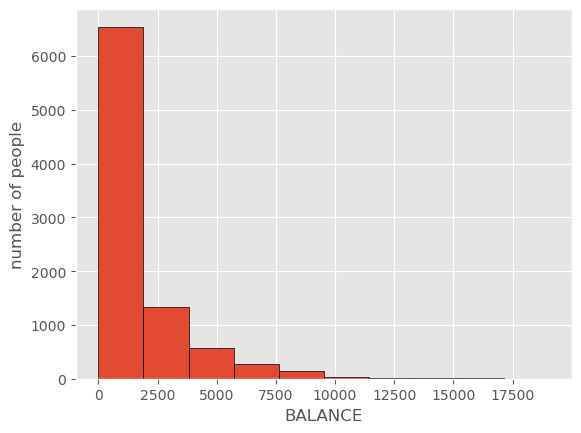

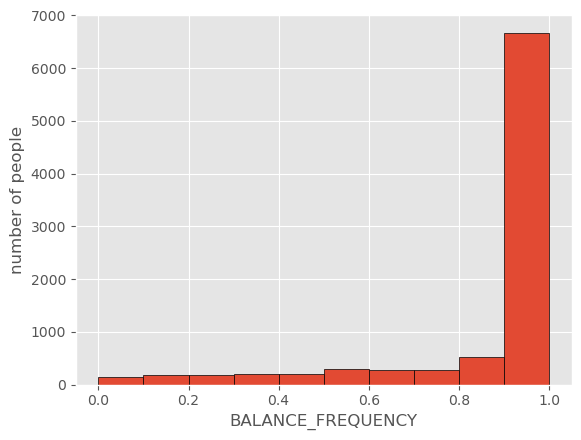

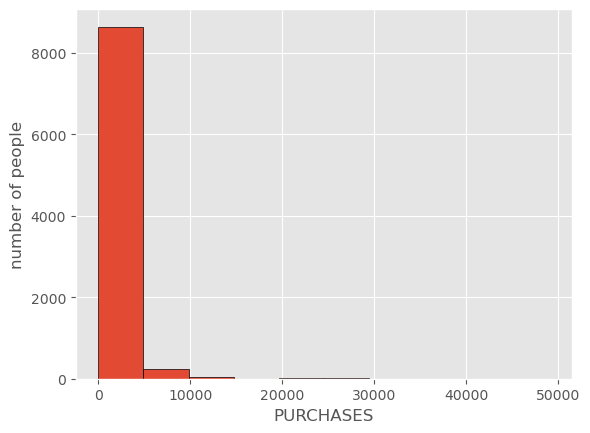

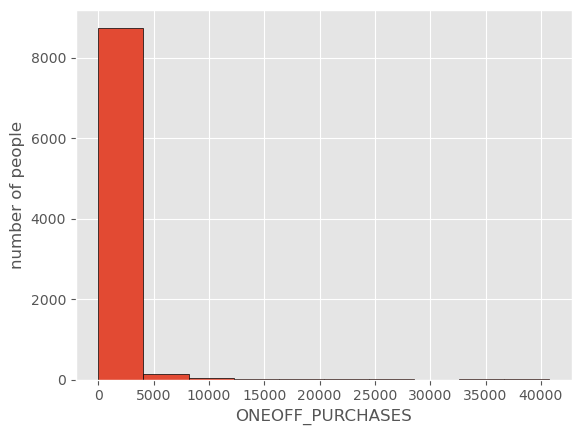

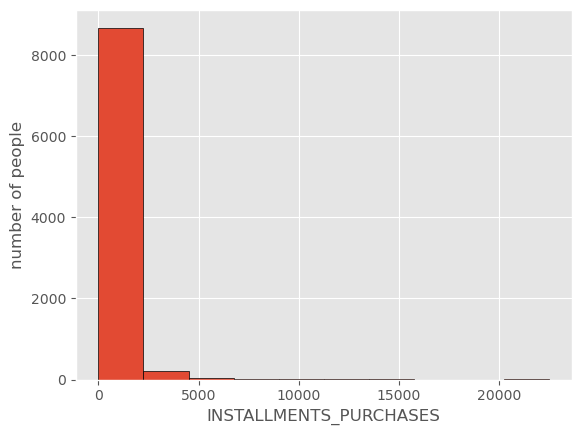

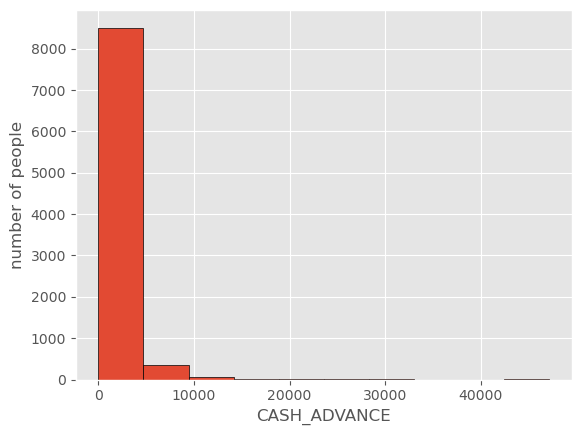

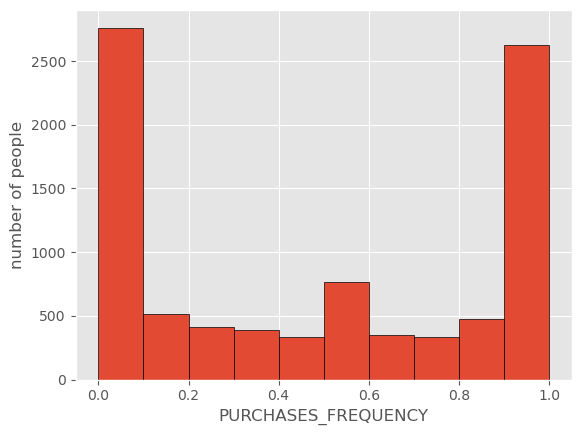

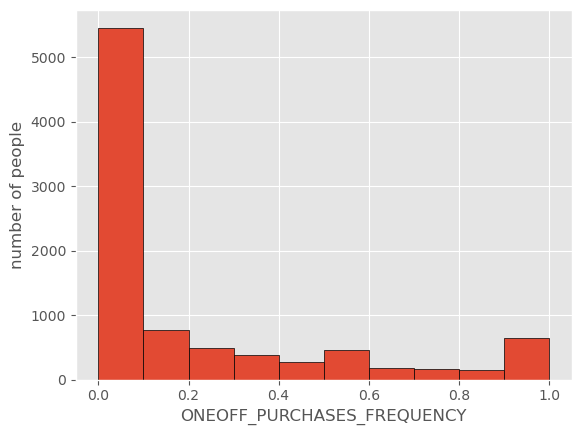

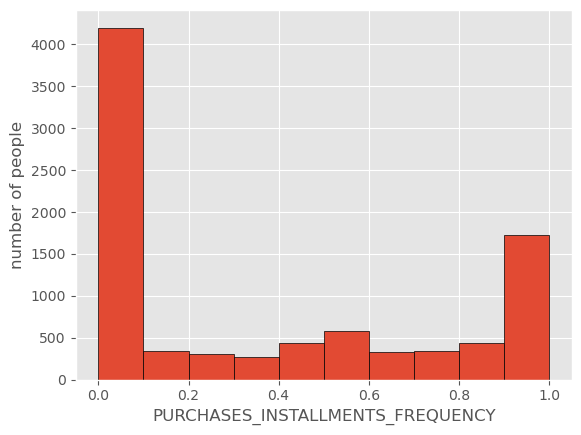

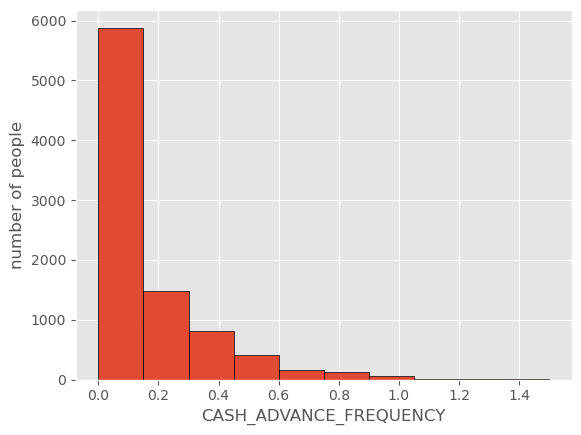

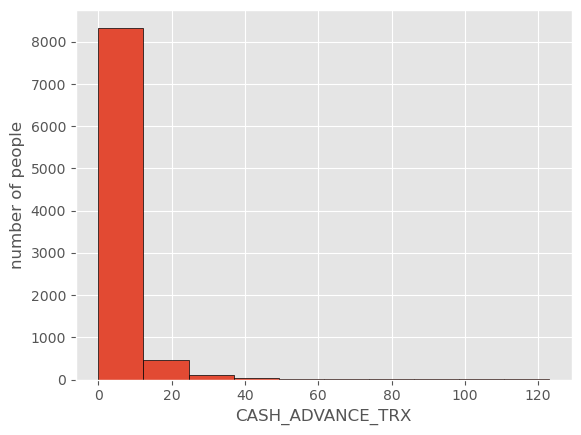

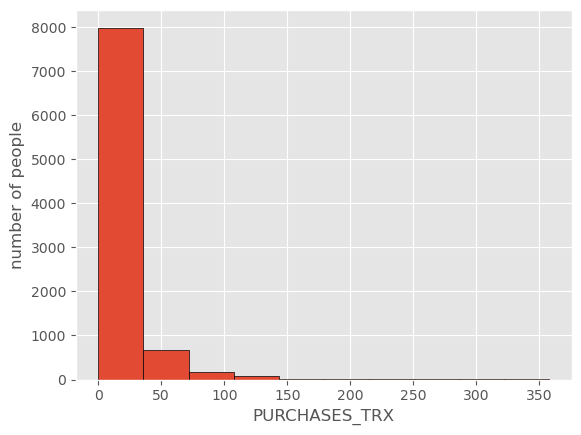

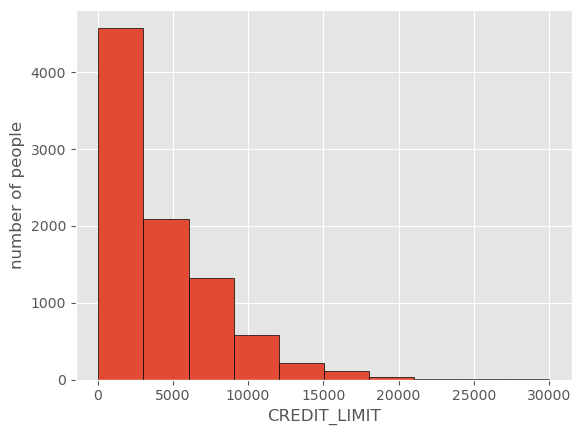

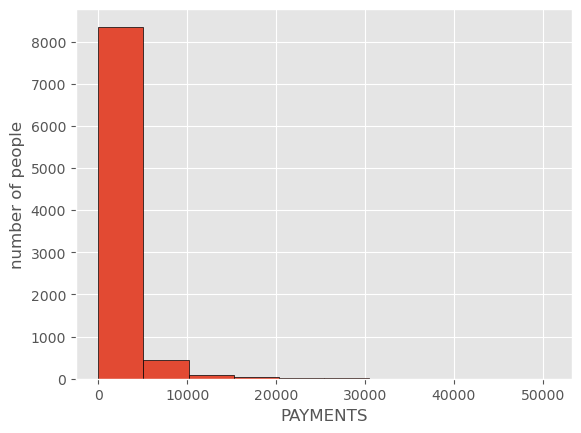

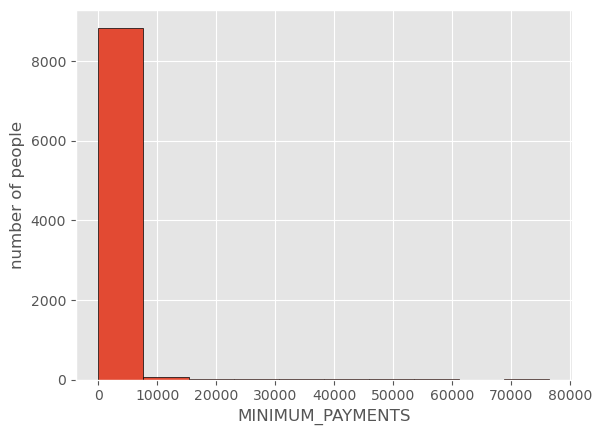

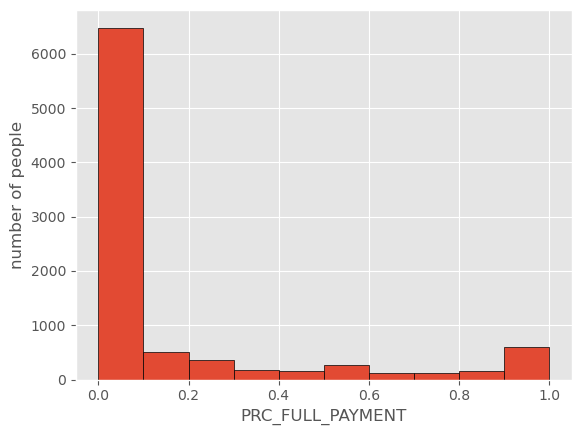

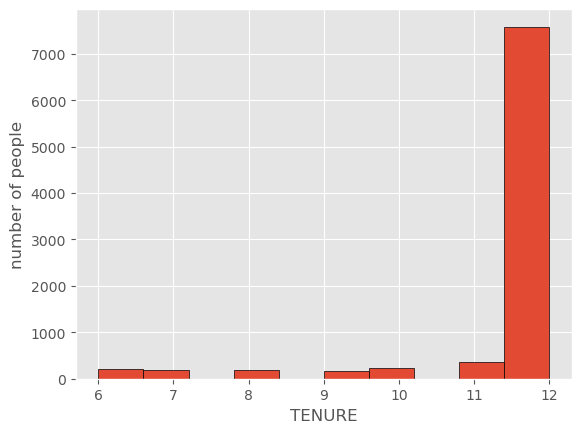

In [19]:
#histograms of all columns except cust_id
for i in data.loc[:, data.columns != 'CUST_ID']:
    plt.hist(data[i], edgecolor='black')
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('number of people')
    plt.show()

Dari hasil output diatas, dapat disimpulkan bahwa sebagian besar distribusinya lebih cenderung ke kiri. Dapat dilihat juga saat menggunakan kartu kredit, sebagian besar nasabah kartu kredit lebih memilih tenor 12 bulan dibandingkan opsi tenor lainnya. Hal ini dapat disimpulkan bahwa nasabah lebih cenderung membayar kredit dalam jangka panjang dengan konsekuensi tingkat bunga yang lebih tinggi.

<AxesSubplot:>

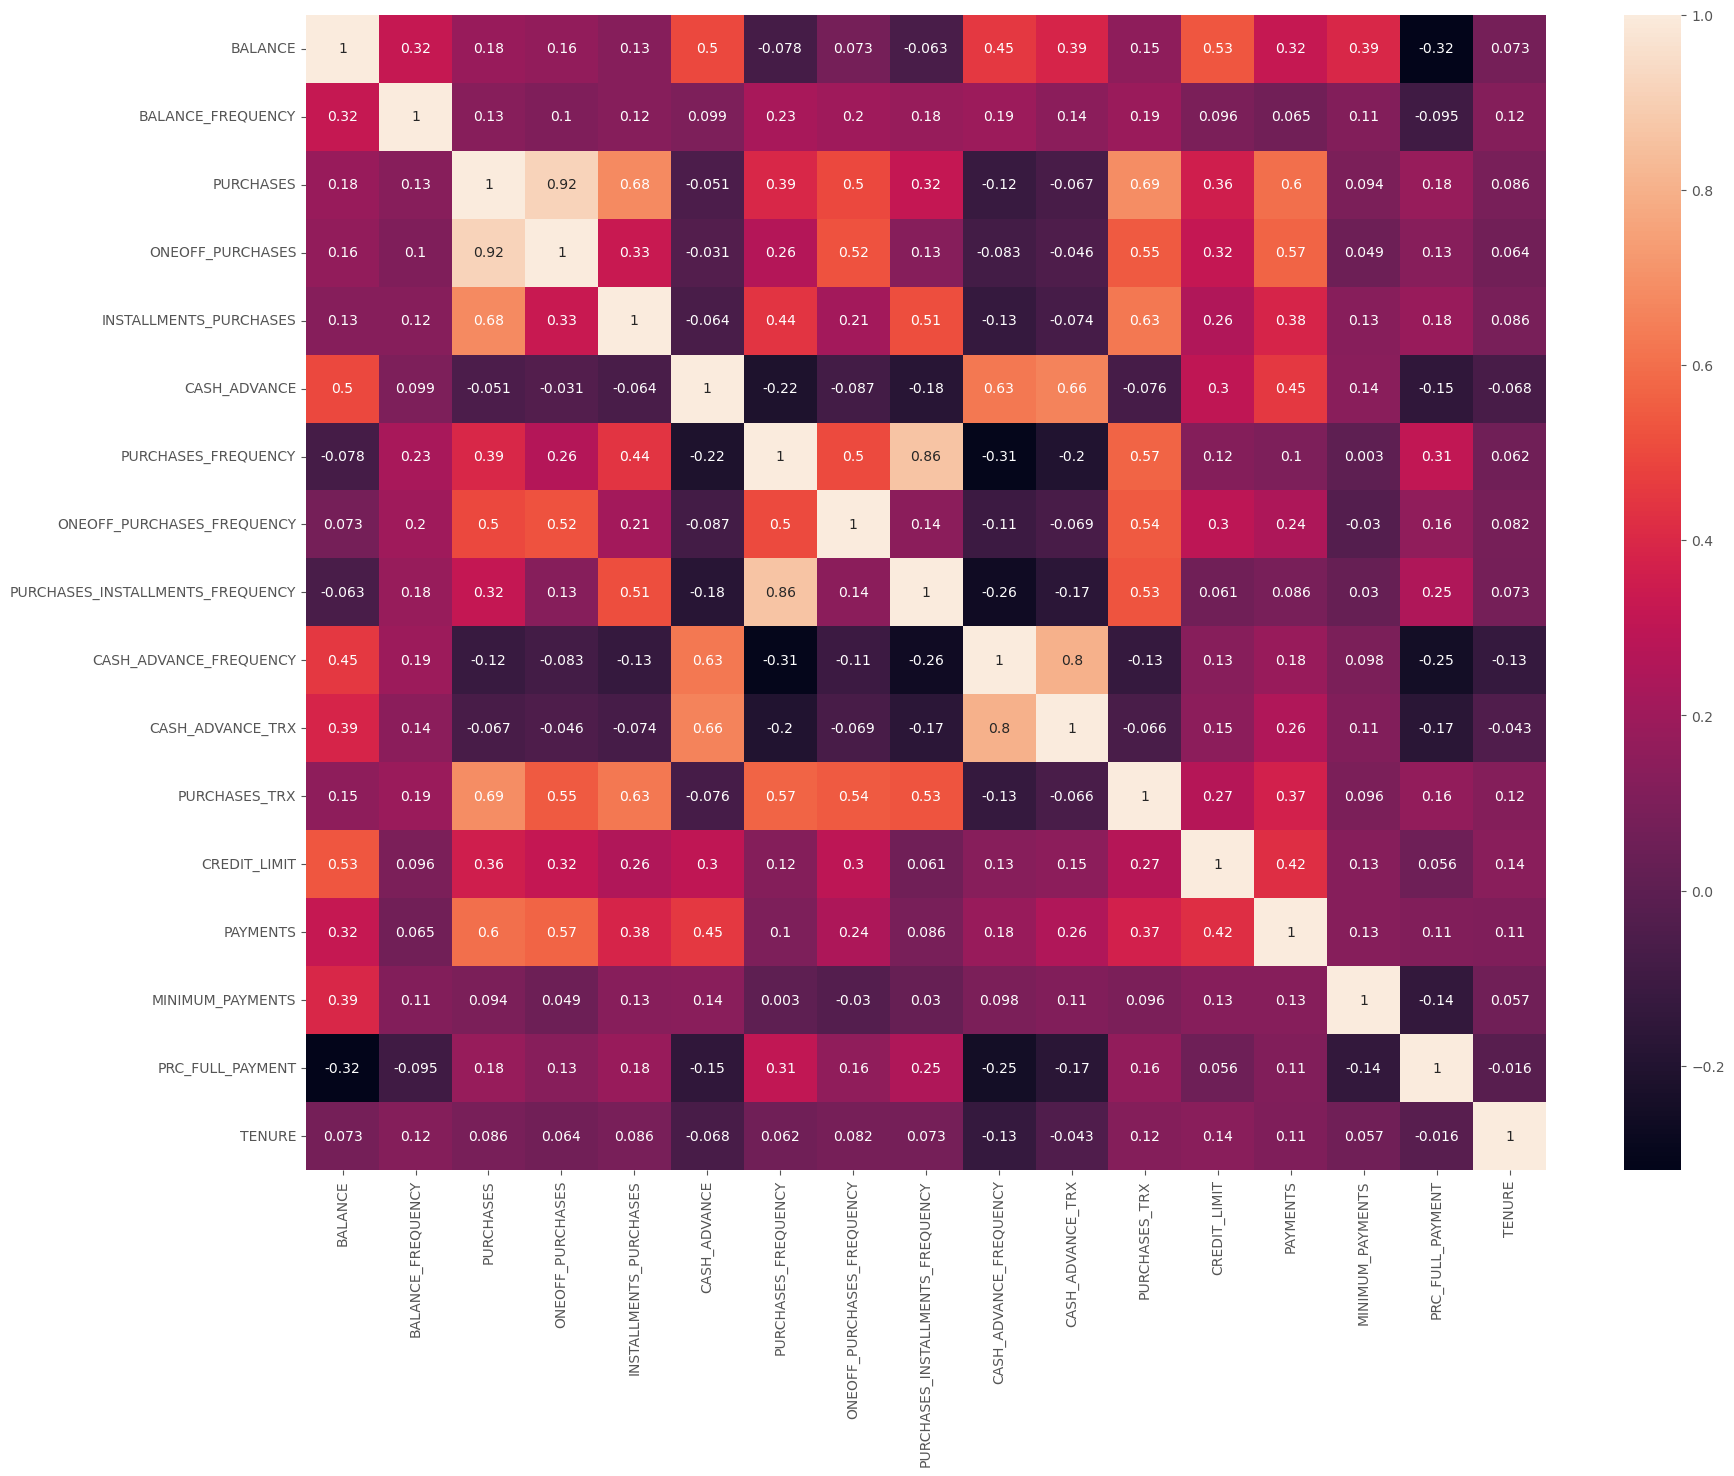

In [20]:
## Menampilkan Heatmap.
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)

Variabel yang memiliki korelasi tinggi adalah 
1. PURCHASES dan ONEOFF_PURCHASES dengan nilai korelasi 0,92. 
2. PURCHASES_INSTALLMENTS_FREQUENCY dengan PURCHASES_FREQUENCY dengan nilai korelasi 0,86
3. CASH_ADVANCE_TRX dengan CASH_ADVANCE_FREQUENCY dengan nilai korelasi 0,8.


In [ ]:
sns.pairplot(data,hue = 'PAYMENTS')

## Data Preprocessing

### Scaling

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)
scaled_data.head()

### Hopskins Test

In [ ]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

In [ ]:
# --- Hopkins Test (codes by Matevž Kunaver) ---
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print (ujd, wjd)
        H = 0
 
    return H

# --- Perform Hopkins Test ---
hopkins_value = hopkins(scaled_data)
print(hopkins_value)
if  0.7 < hopkins_value < 0.99:
    print('not uniformly distributed')
else:
    print('uniformly distributed')

### PCA

In [ ]:
from sklearn.decomposition import PCA

In [24]:
# --- Transform into Array ---
X = np.asarray(scaled_data)

In [25]:
# --- Applying PCA ---
pca = PCA(n_components=2, random_state=24)
X = pca.fit_transform(X)

## Model Definition

1. PCA (Principal Component Analysis) adalah salah satu metode yang digunakan dalam analisis data untuk mengurangi dimensi variabel dalam dataset yang kompleks. Tujuannya adalah untuk mengidentifikasi pola atau struktur yang ada dalam dataset dengan memproyeksikan data ke ruang yang lebih rendah berdasarkan komponen utama (principal components) yang paling berkontribusi terhadap variasi dalam data. PCA mencoba untuk mempertahankan bagian penting yang memiliki lebih banyak variasi data dan menghapus bagian yang tidak penting dengan variasi yang lebih sedikit.

2. K-Means adalah salah satu algoritma unsupervised learning yang digunakan dalam analisis data dan pengelompokan data. Algoritma ini bertujuan untuk membagi data menjadi beberapa kelompok (cluster) berdasarkan kesamaan karakteristiknya.

3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise) adalah salah satu algoritma unsupervised learning yang digunakan dalam pengelompokan data berdasarkan kerapatan. Algoritma ini mengidentifikasi kelompok data yang memiliki kerapatan yang tinggi dan memisahkan data yang memiliki kerapatan rendah atau dianggap sebagai "noise".

4. Hierarchical Clustering adalah salah satu metode unsupervised learning yang digunakan dalam analisis data untuk mengelompokkan objek berdasarkan kesamaan atau perbedaan mereka. Metode ini membangun struktur hirarki berdasarkan kemiripan antara objek yang ada dalam dataset. Agglomerative (Bottom-Up): Dimulai dengan setiap objek sebagai kelompok terpisah, kemudian secara bertahap menggabungkan kelompok-kelompok yang paling mirip berdasarkan jarak atau kesamaan. Proses ini berlanjut hingga semua objek tergabung dalam satu kelompok.

## Model Training

In [26]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

### K-Means

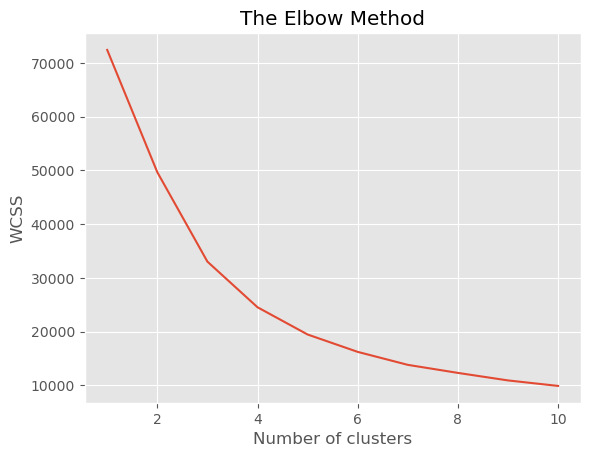

In [27]:
# The Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show();

Berdasarkan hasil dari metode elbow di atas dapat disimpulkan bahwa jumlah clustering terbaik untuk algoritma K-Means adalah 4 cluster.

In [30]:
kmeans = KMeans(n_clusters=4, random_state=32, max_iter=500)
y_kmeans = kmeans.fit_predict(X)

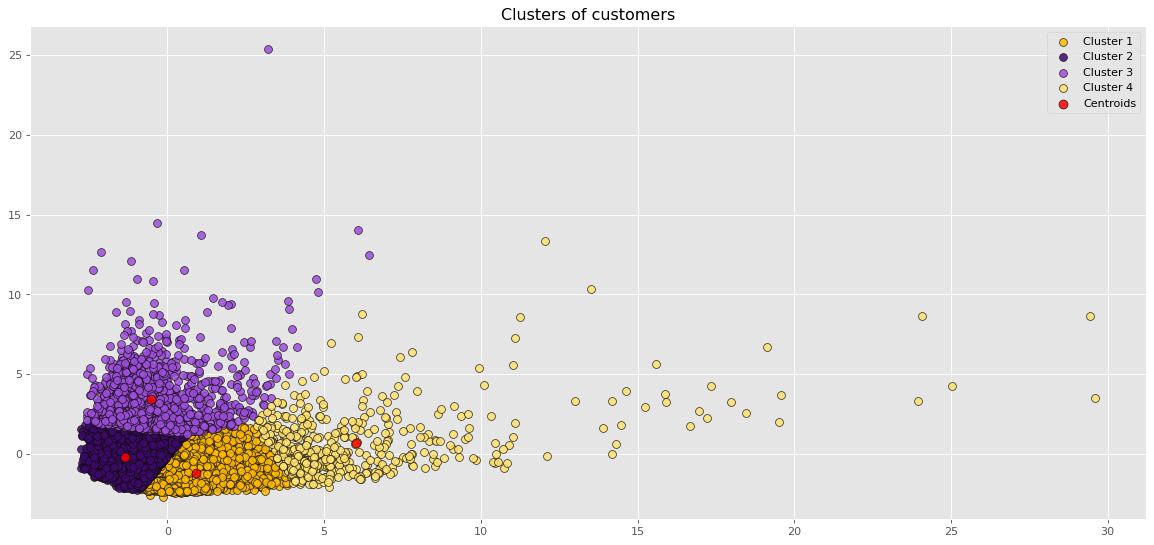

In [31]:
cluster_colors=['#FFBB00', '#3C096C', '#9D4EDD', '#FFE270']
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Centroids']
scatter_style=dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)
plt.figure(figsize=(18, 8), dpi=80)

y_kmeans_labels = list(set(y_kmeans.tolist()))
for i in y_kmeans_labels:
    plt.scatter(X[y_kmeans==i, 0], X[y_kmeans == i, 1], s=50, c=cluster_colors[i], label=labels[i], **scatter_style)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 65, c = 'red', label = 'Centroids', **scatter_style)
plt.title('Clusters of customers')
plt.legend()

Dari hasil scatter plot diatas, dapat dilihat dibandingkan dengan cluster lainnya, cluster 1 dan 2 memiliki viskositas atau tingkat kepadatan yang lebih tinggi. Ini karena sebagian besar titik data terletak di pojok kiri bawah plot, dan jumlah pelanggan di kedua cluster lebih dari 35%. Selain itu, algoritma K-Means mengasumsikan bahwa outlier data merupakan bagian dari cluster 1 dan 4, dimana outlier pada sumbu x termasuk dalam cluster 1, dan outlier pada sumbu y termasuk dalam cluster 4.

In [32]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score

### DBSCAN

In [33]:
# --- Implementing DBSCAN ---
dbscan = DBSCAN(eps=2, min_samples=4)
y_dbscan = dbscan.fit_predict(X)

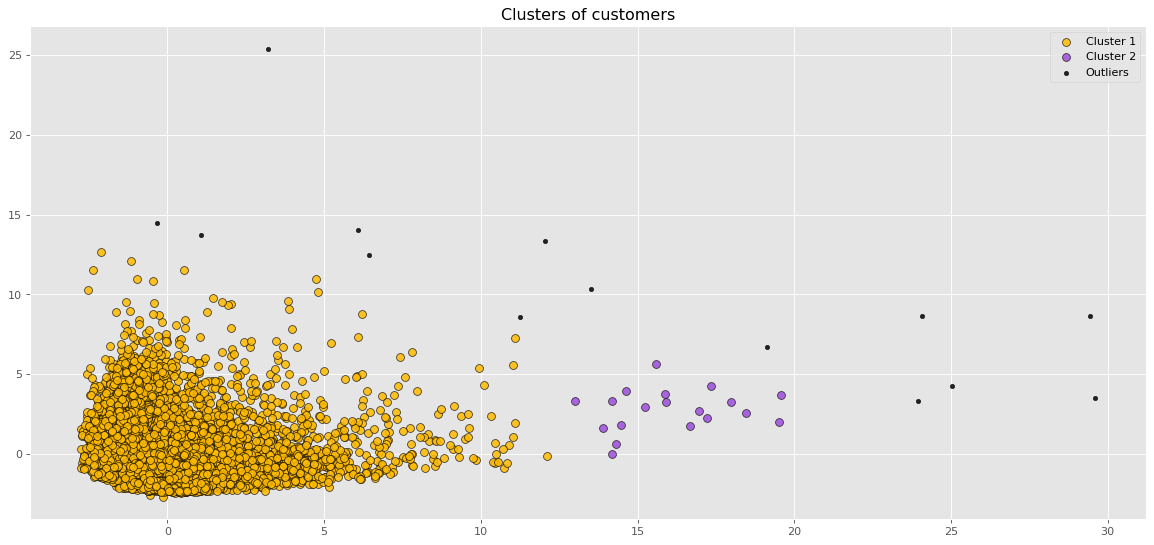

In [34]:
cluster_colors=['#FFBB00', '#9D4EDD', 'black']
labels = ['Cluster 1', 'Cluster 2', 'Outliers']
scatter_style=dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)
plt.figure(figsize=(18, 8), dpi=80)

y_dbscan_labels = list(set(y_dbscan.tolist()))
for i in np.arange(0, 2, 1):
    plt.scatter(X[y_dbscan==i, 0], X[y_dbscan == i, 1], s=50, c=cluster_colors[i], label=labels[i], **scatter_style)
plt.scatter(X[y_dbscan==-1, 0], X[y_dbscan == -1, 1], s=15, c=cluster_colors[2], label=labels[2], **scatter_style)
plt.title('Clusters of customers')
plt.legend()
plt.show();

In [35]:
print('Evaluate Clustering Quality')
print('Davies-Bouldin Index: ', davies_bouldin_score(X, y_dbscan))
print('Silhouette Score: ', silhouette_score(X, y_dbscan))
print('Calinski Harabasz Index: ', calinski_harabasz_score(X, y_dbscan))

Evaluate Clustering Quality
Davies-Bouldin Index:  1.286789385887566
Silhouette Score:  0.8032956722630665
Calinski Harabasz Index:  685.2771789155072


### Hierarchical Clustering (Agglomerative)

In [36]:
import scipy.cluster.hierarchy as shc

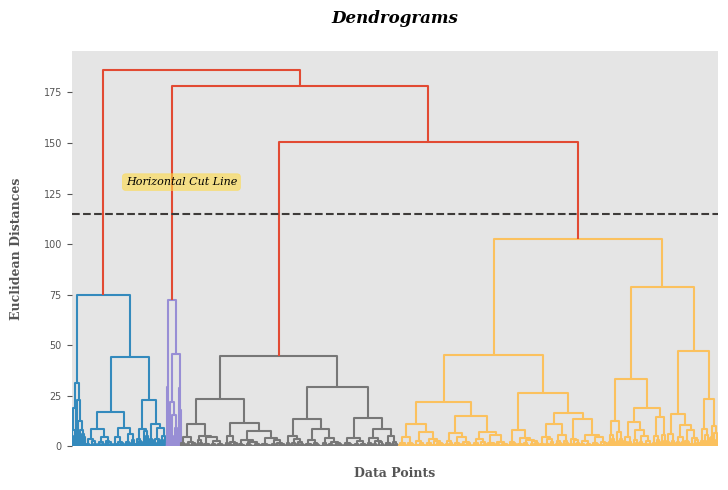

In [37]:
# --- Figure Settings ---
color_palette=['#472165', '#FFBB00', '#3C096C', '#9D4EDD', '#FFE270']
# set_palette(color_palette)
text_style=dict(fontweight='bold', fontfamily='serif')
ann=dict(textcoords='offset points', va='center', ha='center', fontfamily='serif', style='italic')
title=dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
bbox=dict(boxstyle='round', pad=0.3, color='#FFDA47', alpha=0.6)
fig=plt.figure(figsize=(14, 5))
    
# --- Dendrogram Plot ---
ax1=fig.add_subplot(1, 2, 1)
dend=shc.dendrogram(shc.linkage(X, method='ward', metric='euclidean'))
plt.axhline(y=115, color='#3E3B39', linestyle='--')
plt.xlabel('\nData Points', fontsize=9, **text_style)
plt.ylabel('Euclidean Distances\n', fontsize=9, **text_style)
plt.annotate('Horizontal Cut Line', xy=(15000, 130), xytext=(1, 1), fontsize=8, bbox=bbox, **ann)
plt.tick_params(labelbottom=False)
for spine in ax1.spines.values():
    spine.set_color('None')
plt.grid(axis='both', alpha=0)
plt.tick_params(labelsize=7)
plt.title('Dendrograms\n', **title)
plt.tight_layout()
plt.show()

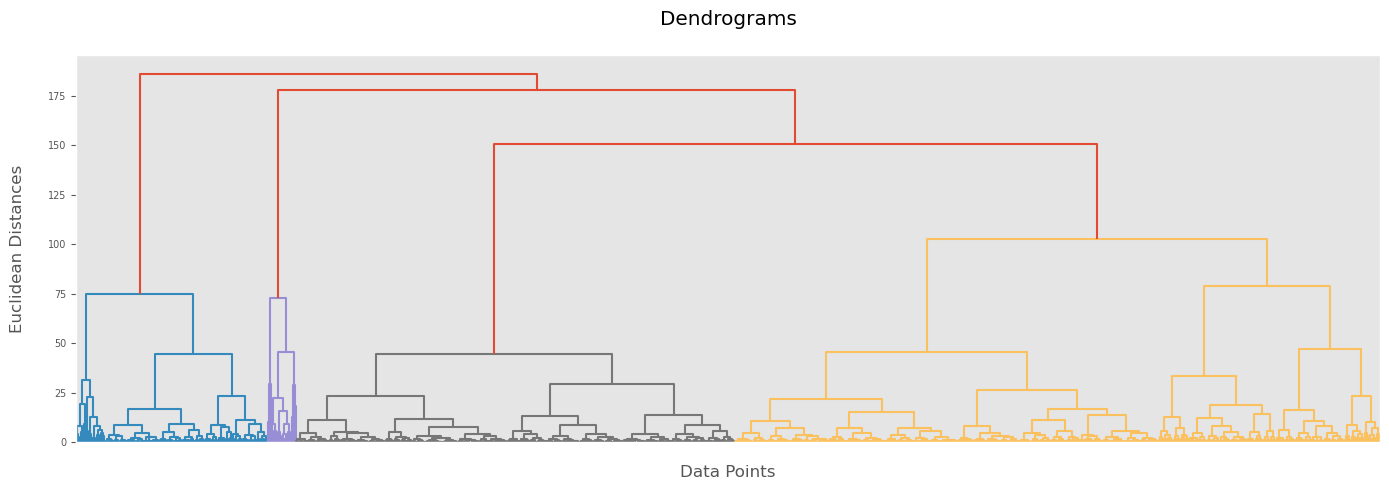

In [38]:
 # --- Figure Settings ---
# color_palette=['#472165', '#FFBB00', '#3C096C', '#9D4EDD', '#FFE270']
# ann=dict(textcoords='offset points', va='center', ha='center', fontfamily='serif', style='italic')
# bbox=dict(boxstyle='round', pad=0.3, color='#FFDA47', alpha=0.6)
plt.figure(figsize=(14, 5))

 # --- Dendrogram Plot ---
dend=shc.dendrogram(shc.linkage(X, method='ward', metric='euclidean'))
# plt.axhline(y=115, color='#3E3B39', linestyle='--')
plt.xlabel('\nData Points')
plt.ylabel('Euclidean Distances\n')
# plt.annotate('Horizontal Cut Line', xy=(15000, 130), xytext=(1, 1), fontsize=8, bbox=bbox, **ann)
plt.tick_params(labelbottom=False)
plt.grid(axis='both', alpha=0)
plt.tick_params(labelsize=7)
plt.title('Dendrograms\n')
plt.tight_layout()
plt.show();

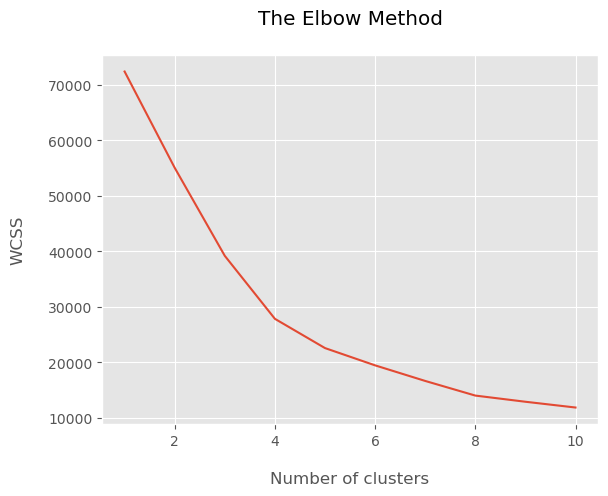

In [39]:
wcss = []
for i in range(1, 11):
    agg_cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    agg_cluster.fit(X)
    cluster_labels = agg_cluster.labels_
    cluster_centers = np.empty((i, X.shape[1]))
    for label in range(i):
        cluster_centers[label] = np.mean(X[cluster_labels == label], axis=0)
    within_cluster_squares = np.sum((X - cluster_centers[cluster_labels]) ** 2)
    wcss.append(within_cluster_squares)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method\n')
plt.xlabel('\nNumber of clusters')
plt.ylabel('WCSS\n')

plt.show()

In [40]:
# --- Implementing Hierarchical Clustering ---
agg_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_agg_cluster = agg_cluster.fit_predict(X)

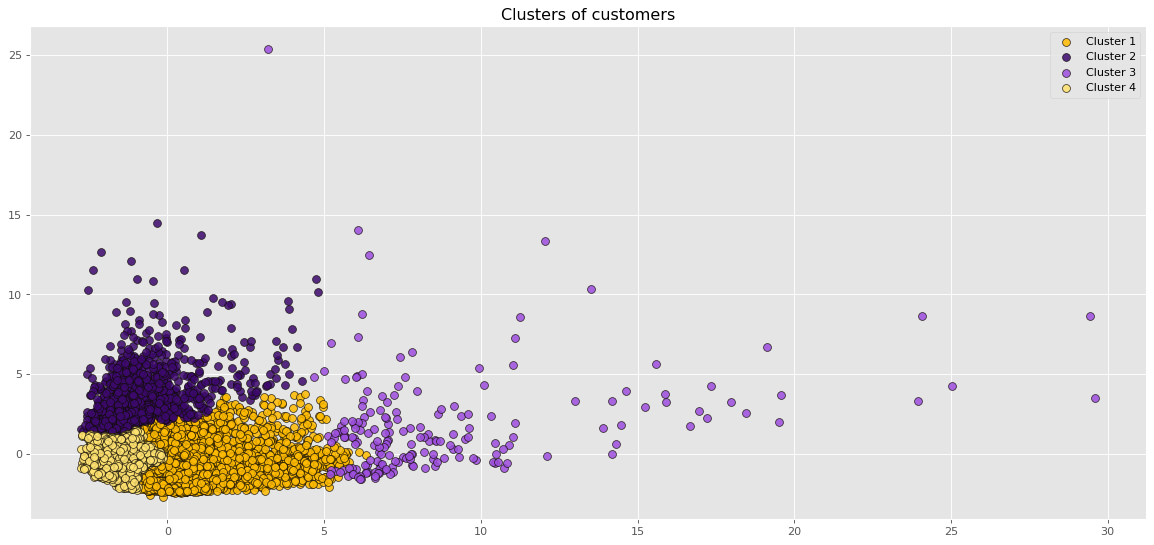

In [41]:
cluster_colors=['#FFBB00', '#3C096C', '#9D4EDD', '#FFE270']
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
scatter_style=dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)
plt.figure(figsize=(18, 8), dpi=80)

y_agg_labels = list(set(y_agg_cluster.tolist()))
for i in y_agg_labels:
    plt.scatter(X[y_agg_cluster==i, 0], X[y_agg_cluster == i, 1], s=50, c=cluster_colors[i], label=labels[i], **scatter_style)
plt.title('Clusters of customers')
plt.legend()
plt.show();

### K-Means

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples, silhouette_score

#### 1. Corelation observed between CREDIT_LIMIT-BALANCE

In [43]:
X2 = scaled_data.iloc[:,[12,0]]
X2.head()

,CREDIT_LIMIT,BALANCE
0,-0.960433,-0.731989
1,0.688639,0.786961
2,0.826062,0.447135
3,0.826062,0.049099
4,-0.905464,-0.358775


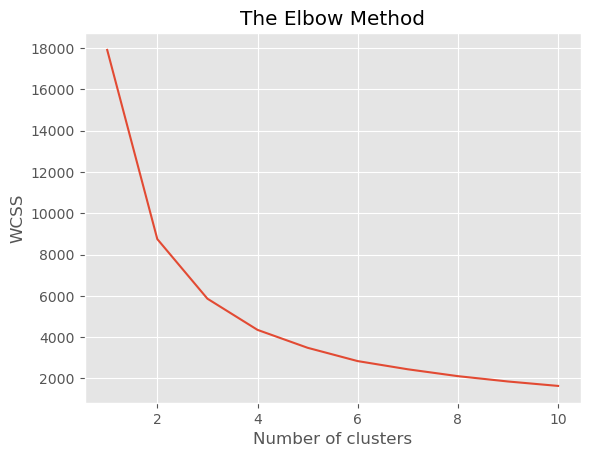

In [44]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [45]:
from sklearn.metrics import silhouette_score
score=[]
for k in range(2, 11):
 kmeans = KMeans(n_clusters=k, random_state=123).fit(X2)
 silhouette_avg = silhouette_score(X2,kmeans.labels_)
 score.append(silhouette_score(X2,kmeans.labels_))
 print('Silhouette Score untuk %i Cluster: %0.4f' % (k, 
silhouette_avg))

Silhouette Score untuk 2 Cluster: 0.5924
Silhouette Score untuk 3 Cluster: 0.5079
Silhouette Score untuk 4 Cluster: 0.5280
Silhouette Score untuk 5 Cluster: 0.4773
Silhouette Score untuk 6 Cluster: 0.4485
Silhouette Score untuk 7 Cluster: 0.4194
Silhouette Score untuk 8 Cluster: 0.4095
Silhouette Score untuk 9 Cluster: 0.4146
Silhouette Score untuk 10 Cluster: 0.4090


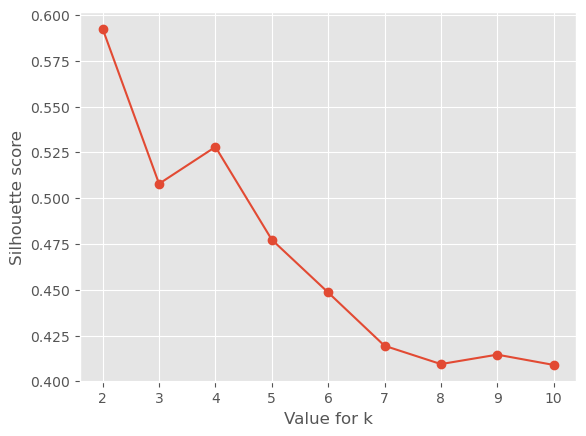

In [46]:
plt.plot(range(2, 11), score, 'o-')
plt.xlabel("Value for k")
plt.ylabel("Silhouette score")
plt.show()

In [99]:
kmeans2 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans2 = kmeans2.fit_predict(X2)
X2 = X2.values

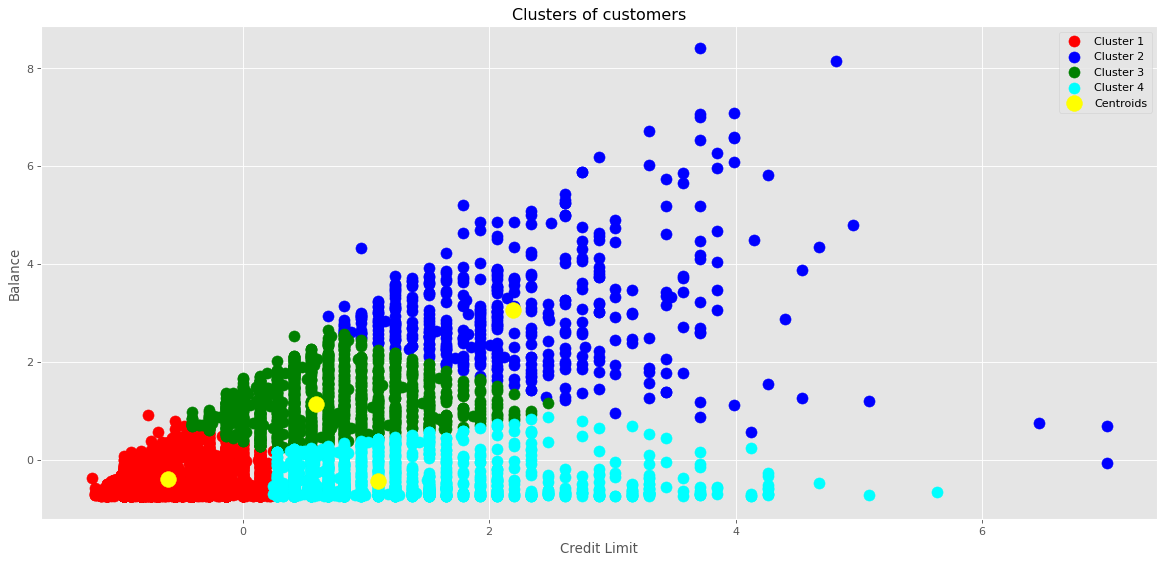

In [100]:
plt.figure(figsize=(18, 8), dpi=80)
plt.scatter(X2[y_kmeans2 == 0, 0], X2[y_kmeans2 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X2[y_kmeans2 == 1, 0], X2[y_kmeans2 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X2[y_kmeans2 == 2, 0], X2[y_kmeans2 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X2[y_kmeans2 == 3, 0], X2[y_kmeans2 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Credit Limit')
plt.ylabel('Balance')
plt.legend()
plt.show()

- From the sequence of left to right, the first centrod signifies customers where both credit limit and balance are low which shows that these customers doesnot have much purchasing power and shoudld not be our focus area
- Customers falling under the second centroid bracket are somewhat engaging with us but since their balance and credit limits are low, their purchasing power will not be that high. Some special benifits in terms of better credit limit can be given to convert them into next class
- Customers falling under the third centroid are the most valuable. Their credit limit is high and so are their balance. This category customers should be targeted with better offers to shop via our credit card. They are our most performing customers
- Custmers in the last centriod are the ones whose balance is low but they have high credit limit which suggest that these customers are loyal and shoudld be retaned by giving engagement offers

#### 2. Corelation observed between PURCHASES-PAYMENTS

In [92]:
X = data.iloc[:,[2,13]]
X.head()

,PURCHASES,PAYMENTS
0,95.40,201.802084
1,0.00,4103.032597
2,773.17,622.066742
3,1499.00,0.000000
4,16.00,678.334763


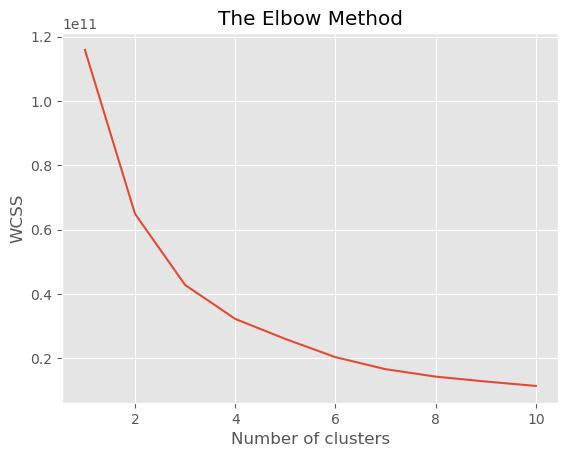

In [93]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [47]:
from sklearn.metrics import silhouette_score
score=[]
for k in range(2, 11):
 kmeans = KMeans(n_clusters=k, random_state=123).fit(X)
 silhouette_avg = silhouette_score(X,kmeans.labels_)
 score.append(silhouette_score(X,kmeans.labels_))
 print('Silhouette Score untuk %i Cluster: %0.4f' % (k, 
silhouette_avg))

Silhouette Score untuk 2 Cluster: 0.4649
Silhouette Score untuk 3 Cluster: 0.4524
Silhouette Score untuk 4 Cluster: 0.4077
Silhouette Score untuk 5 Cluster: 0.4012
Silhouette Score untuk 6 Cluster: 0.3896
Silhouette Score untuk 7 Cluster: 0.3805
Silhouette Score untuk 8 Cluster: 0.3944
Silhouette Score untuk 9 Cluster: 0.3707
Silhouette Score untuk 10 Cluster: 0.3630


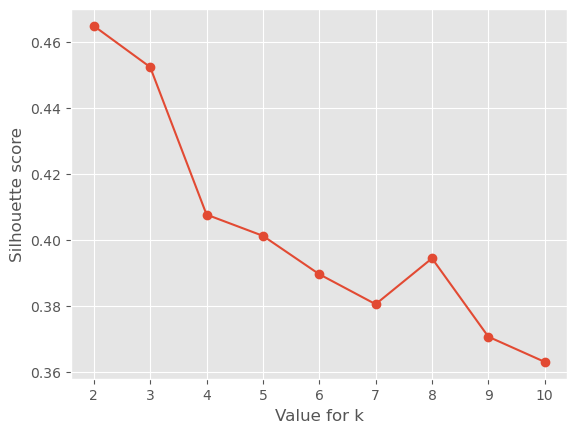

In [48]:
plt.plot(range(2, 11), score, 'o-')
plt.xlabel("Value for k")
plt.ylabel("Silhouette score")
plt.show()

In [95]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
X = X.values

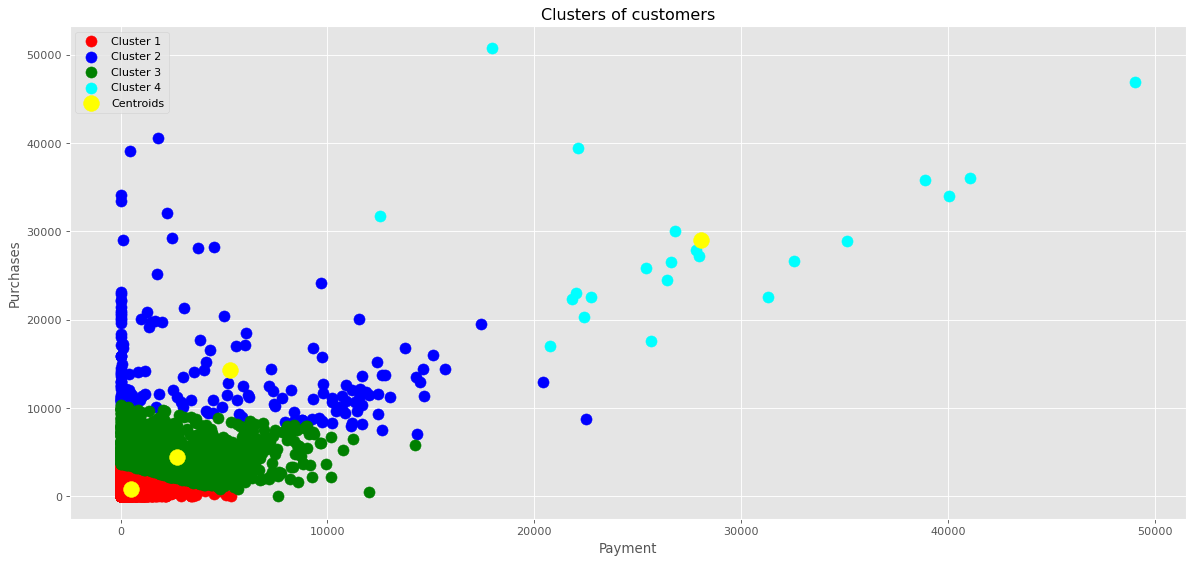

In [96]:
plt.figure(figsize=(18, 8), dpi=80)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Payment')
plt.ylabel('Purchases')
plt.legend()
plt.show()

- From the sequence of left to right, the first centrod signifies customers where both credit limit and balance are low which shows that these customers doesnot have much purchasing power and shoudld not be our major focus area
- Customers falling under the second centroid bracket are somewhat engaging with us but since their purchases and payment are low, their purchasing power is not be that high. Thus, some special benifits in terms of better credit limit or discounts can be given to convert them into next class
- Customers falling under the third centroid are the most valuable. Their payment is low but their purchases is high. These customers likes to shop on offers and discounts and can be better targeted by doscount and cashback coupons on credit card usage
- Custmers in the last centriod are our honest customers. They pay more to purchase more and should be retained by providing customer engagement benifits
- Dari urutan kiri ke kanan, sentroid pertama menandakan pelanggan di mana baik batas kredit dan saldo rendah yang menunjukkan bahwa pelanggan ini tidak memiliki daya beli yang banyak dan seharusnya tidak menjadi area fokus kami.
- Pelanggan yang berada pada centroid kedua agak terlibat dengan kami, tetapi karena saldo dan batas kredit mereka rendah, daya beli mereka tidak akan setinggi itu. Beberapa keuntungan khusus dalam hal batas kredit yang lebih baik dapat diberikan untuk mengubahnya menjadi kelas selanjutnya
- Pelanggan yang berada pada centroid ketiga adalah yang paling berharga. Batas kredit mereka tinggi dan begitu pula saldo mereka. Pelanggan kategori ini harus ditargetkan dengan penawaran yang lebih baik untuk berbelanja melalui kartu kredit kami. Mereka adalah pelanggan kami yang paling berkinerja
- Pelanggan pada sentriod terakhir adalah pelanggan yang saldonya rendah tetapi memiliki batas kredit yang tinggi yang menunjukkan bahwa pelanggan tersebut loyal dan harus dipertahankan dengan memberikan penawaran keterlibatan.

## Model Evaluation & Inference

### K-Means

In [51]:
db_kmeans = davies_bouldin_score(X, y_kmeans)
ss_kmeans = silhouette_score(X, y_kmeans) 
ch_kmeans = calinski_harabasz_score(X, y_kmeans)

print('Evaluate Clustering Quality')
print('Davies-Bouldin Index: ', db_kmeans)
print('Silhouette Score: ', ss_kmeans)
print('Calinski Harabasz Index: ', ch_kmeans)

Evaluate Clustering Quality
Davies-Bouldin Index:  0.828993493440721
Silhouette Score:  0.6553986395920018
Calinski Harabasz Index:  7730.176827400786


In [52]:
db_dbscan = davies_bouldin_score(X, y_dbscan)
ss_dbscan = silhouette_score(X, y_dbscan)
ch_dbscan = calinski_harabasz_score(X, y_dbscan)

print('Evaluate Clustering Quality')
print('Davies-Bouldin Index: ', db_dbscan)
print('Silhouette Score: ', ss_dbscan)
print('Calinski Harabasz Index: ', ch_dbscan)

Evaluate Clustering Quality
Davies-Bouldin Index:  1.8305989812248091
Silhouette Score:  0.9046834981488273
Calinski Harabasz Index:  1781.9176656461252


In [53]:
db_agg = davies_bouldin_score(X, y_agg_cluster)
ss_agg = silhouette_score(X, y_agg_cluster)
ch_agg = calinski_harabasz_score(X, y_agg_cluster)

print('Evaluate Clustering Quality')
print('Davies-Bouldin Index: ', db_agg)
print('Silhouette Score: ', ss_agg)
print('Calinski Harabasz Index: ', ch_agg)

Evaluate Clustering Quality
Davies-Bouldin Index:  1.814528222502406
Silhouette Score:  0.026398684918996305
Calinski Harabasz Index:  1730.7992768940762


In [54]:
# --- Comparison Table ---
compare = pd.DataFrame({'Model': ['K-Means', 'DBSCAN', 'Hierarchical Clustering'], 
                        'Davies-Bouldin Index': [db_kmeans, db_dbscan, db_agg],
                        'Silhouette Score': [ss_kmeans, ss_dbscan, ss_agg],
                       'Calinski-Harabasz Index': [ch_kmeans, ch_dbscan, ch_agg]})

# --- Create Accuracy Comparison Table ---
print('Model Accuracy Comparison')
compare.sort_values(by='Model', ascending=False).style.background_gradient(cmap='inferno_r').hide_index()

Model Accuracy Comparison


Model,Davies-Bouldin Index,Silhouette Score,Calinski-Harabasz Index
K-Means,0.828993,0.655399,7730.176827
Hierarchical Clustering,1.814528,0.026399,1730.799277
DBSCAN,1.830599,0.904683,1781.917666


## Kesimpulan

In [55]:
# --- Add K-Means Prediction to Data Frame ----
data['cluster_result'] = y_kmeans+1
data['cluster_result'] = 'Cluster '+ data['cluster_result'].astype(str)

In [56]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_result
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,Cluster 1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,Cluster 3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,Cluster 1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,Cluster 1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,Cluster 1


In [57]:
# --- Calculationg Overall Mean from Current Data Frame ---
data_profile_overall = pd.DataFrame()
data_profile_overall['Overall'] = data.describe().loc[['mean']].T

# --- Summarize Mean of Each Clusters --- 
data_cluster_summary = data.groupby('cluster_result').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})
data_cluster_summary = data_cluster_summary[data_cluster_summary['Metrics'] == 'mean'].set_index('Column Name')

# --- Combining Both Data Frame ---
print('Summarize of Each Clusters')
data_profile = data_cluster_summary.join(data_profile_overall).reset_index()
data_profile.style.background_gradient(cmap='YlOrBr').hide_index()

Summarize of Each Clusters


Column Name,Metrics,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Overall
BALANCE,mean,1346.240335,4305.574230,2383.648573,5407.063881,1564.474828
BALANCE_FREQUENCY,mean,0.868153,0.888050,0.926570,0.954132,0.877271
PURCHASES,mean,521.614165,5295.535349,2729.727198,28036.451364,1003.204834
ONEOFF_PURCHASES,mean,270.833764,3290.933721,1701.102289,22587.397273,592.437371
INSTALLMENTS_PURCHASES,mean,251.046295,2004.729535,1029.148430,5449.054091,411.067645
CASH_ADVANCE,mean,738.191437,6066.116406,1669.823234,1691.321879,978.871112
PURCHASES_FREQUENCY,mean,0.451652,0.608659,0.688607,0.900758,0.490351
ONEOFF_PURCHASES_FREQUENCY,mean,0.154857,0.438180,0.432412,0.828030,0.202458
PURCHASES_INSTALLMENTS_FREQUENCY,mean,0.332986,0.491065,0.521595,0.695454,0.364437
CASH_ADVANCE_FREQUENCY,mean,0.126834,0.289659,0.163392,0.064394,0.135144


Berdasarkan tabel di atas, dapat disimpulkan bahwa setiap Cluster memiliki karakteristik sebagai berikut:

- Cluster 1: Pengguna Cicilan - Menggunakan kartu kredit khusus untuk cicilan, transaksi besar dengan cicilan, frekuensi dan jumlah pencairan tunai kecil. Jarang melakukan pembayaran.

- Cluster 2: Pengguna Pemula/Mahasiswa - Jarang menggunakan kartu kredit untuk transaksi dan cicilan, saldo kecil, frekuensi perubahan saldo rendah, batas kredit rendah. Digunakan terutama untuk penarikan tunai.

- Cluster 3: Pengguna Penarikan Tunai - Saldo tinggi, frekuensi perubahan saldo tinggi, sering melakukan pencairan tunai. Jarang melakukan cicilan atau pembelian satu kali.

- Cluster 4: Pengguna Pembayar Penuh - Pengguna aktif kartu kredit bank, sering mengubah saldo, jumlah saldo tinggi, frekuensi transaksi dan cicilan tinggi. Skor kredit baik.

Klaster 1 adalah pengguna cicilan dengan transaksi besar, Klaster 2 adalah pengguna pemula/mahasiswa dengan penggunaan kartu kredit terbatas, Klaster 3 adalah pengguna yang sering melakukan penarikan tunai, dan Klaster 4 adalah pengguna aktif dengan saldo tinggi .

Berdasarkan hasil di atas, berikut adalah beberapa saran untuk strategi pemasaran:

- Cluster 4: Fokus pada pemasaran kepada pelanggan yang aktif menggunakan kartu kredit. Tawarkan manfaat dan reward untuk menggunakan kartu kredit lebih sering.

- Cluster 1: Pemasaran khusus untuk kartu kredit cicilan. Tawarkan program cicilan dengan bunga rendah atau 0% untuk menarik pelanggan dalam klaster ini.

- Cluster 2: Tawarkan kartu kredit khusus untuk pemula atau mahasiswa. Sediakan fitur seperti pembebasan biaya, reward untuk pembayaran tepat waktu, dan kesempatan upgrade ke produk yang lebih baik.

- Cluster 3: Tawarkan kartu kredit khusus dengan manfaat penarikan tunai, seperti biaya rendah atau tidak ada, suku bunga rendah, dan masa jabatan yang lebih lama. Juga pertimbangkan program bayar nanti atau pinjaman pribadi.

Dengan menerapkan strategi pemasaran yang tepat untuk setiap cluster, bank dapat meningkatkan efektivitas pemasaran dan menarik lebih banyak pelanggan untuk menggunakan kartu kredit mereka.